# Example of sequential fitting
finding the location of the Bar in each tube for a data set from a Bar in a Bar scan for GPSANS

In [1]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np
import lmfit

In [2]:
%matplotlib notebook

check which directory we are in

In [3]:
pwd

'/Users/19g/builds/IPythonNotebookTutorial/solutions'

In [1]:
data_dir = './Data/Fitting/'

Load the xml file 

Get the root of the XML tree


Use findall to figure out where the necessary information is in the xml file.
Specifically we want to find the motor position of the Bar and we want to look at the data.

[<Element 'Header' at 0x1a18e257c8>,
 <Element 'sample_info' at 0x1a18e2ee08>,
 <Element 'Motor_Positions' at 0x1a18e2ef48>,
 <Element 'Parameter_Positions' at 0x1a18e33b88>,
 <Element 'Counters' at 0x1a18e3a098>,
 <Element 'Data' at 0x1a18e3a228>]

First let's work with the motor position

[<Element 'highvoltagecmd' at 0x1a18e2ef98>,
 <Element 'selector_speed' at 0x1a18e33048>,
 <Element 'selector_tilt' at 0x1a18e33098>,
 <Element 'cuv1' at 0x1a18e330e8>,
 <Element 'cuv2' at 0x1a18e33138>,
 <Element 'cuv3' at 0x1a18e33188>,
 <Element 'cuv4' at 0x1a18e331d8>,
 <Element 'lambda' at 0x1a18e33228>,
 <Element 'dlambda' at 0x1a18e33278>,
 <Element 'sdd' at 0x1a18e33318>,
 <Element 'coll_1' at 0x1a18e33368>,
 <Element 'coll_2' at 0x1a18e333b8>,
 <Element 'coll_3' at 0x1a18e33408>,
 <Element 'coll_4' at 0x1a18e33458>,
 <Element 'coll_5' at 0x1a18e334a8>,
 <Element 'coll_6' at 0x1a18e334f8>,
 <Element 'coll_7' at 0x1a18e33548>,
 <Element 'coll_8' at 0x1a18e33598>,
 <Element 'nguides' at 0x1a18e335e8>,
 <Element 'attenuator_pos' at 0x1a18e33688>,
 <Element 'beam_trap_x' at 0x1a18e33728>,
 <Element 'dcal' at 0x1a18e337c8>,
 <Element 'detector_trans' at 0x1a18e33818>,
 <Element 'flange_det_dist' at 0x1a18e33868>,
 <Element 'sample_x' at 0x1a18e338b8>,
 <Element 'trap_y_101mm' at 0x1

Let us get the value 

'284.999998'

Use the position to finf the pixel number. assuming a 1.1 m tube with 256 pixels

Let's print the values

285.000 190.836


Next we work with the data

what attributes does it have?

dict_keys(['type'])

'INT32[192,256]'

We'll use the type attribute to help format the data array in memory

In [16]:
dt.text

'\n1\t0\t0\t2\t1\t6\t4\t15\t26\t23\t30\t22\t37\t22\t27\t26\t30\t36\t30\t32\t38\t18\t27\t26\t47\t33\t26\t32\t30\t30\t24\t32\t27\t42\t24\t37\t27\t44\t42\t25\t36\t28\t26\t34\t35\t31\t37\t35\t37\t44\t30\t40\t39\t33\t38\t42\t32\t29\t32\t32\t39\t30\t27\t26\t21\t34\t33\t33\t36\t31\t25\t24\t36\t34\t32\t17\t20\t33\t40\t26\t24\t30\t40\t34\t31\t51\t40\t39\t31\t26\t28\t19\t22\t32\t34\t38\t28\t28\t26\t31\t27\t26\t31\t39\t28\t32\t37\t29\t32\t34\t31\t23\t31\t30\t38\t38\t24\t28\t30\t34\t31\t39\t36\t26\t36\t27\t26\t36\t29\t41\t35\t41\t34\t28\t29\t25\t35\t30\t28\t30\t36\t29\t33\t39\t34\t32\t32\t37\t29\t33\t31\t34\t36\t39\t43\t24\t36\t35\t28\t35\t21\t28\t34\t48\t29\t30\t28\t30\t36\t26\t38\t33\t30\t27\t45\t35\t44\t32\t35\t30\t56\t35\t29\t26\t29\t24\t26\t22\t12\t8\t3\t2\t4\t3\t1\t4\t16\t21\t25\t35\t41\t28\t31\t30\t35\t30\t24\t31\t28\t33\t33\t32\t29\t24\t28\t32\t33\t46\t39\t28\t37\t39\t41\t36\t27\t41\t33\t37\t42\t38\t30\t36\t36\t34\t27\t36\t31\t29\t37\t26\t35\t29\t33\t31\t36\t33\t27\t29\t17\t2\t3\t2\t2\t2\t

We need to convert the text from a string to an array and shape it appropriately
We'll use the fromstring command of numpy

In [17]:
dat_array=np.fromstring(dt.text,sep='\t').reshape((192,256))
dat_array.shape

(192, 256)

Show the image and it's transpose 

<IPython.core.display.Javascript object>


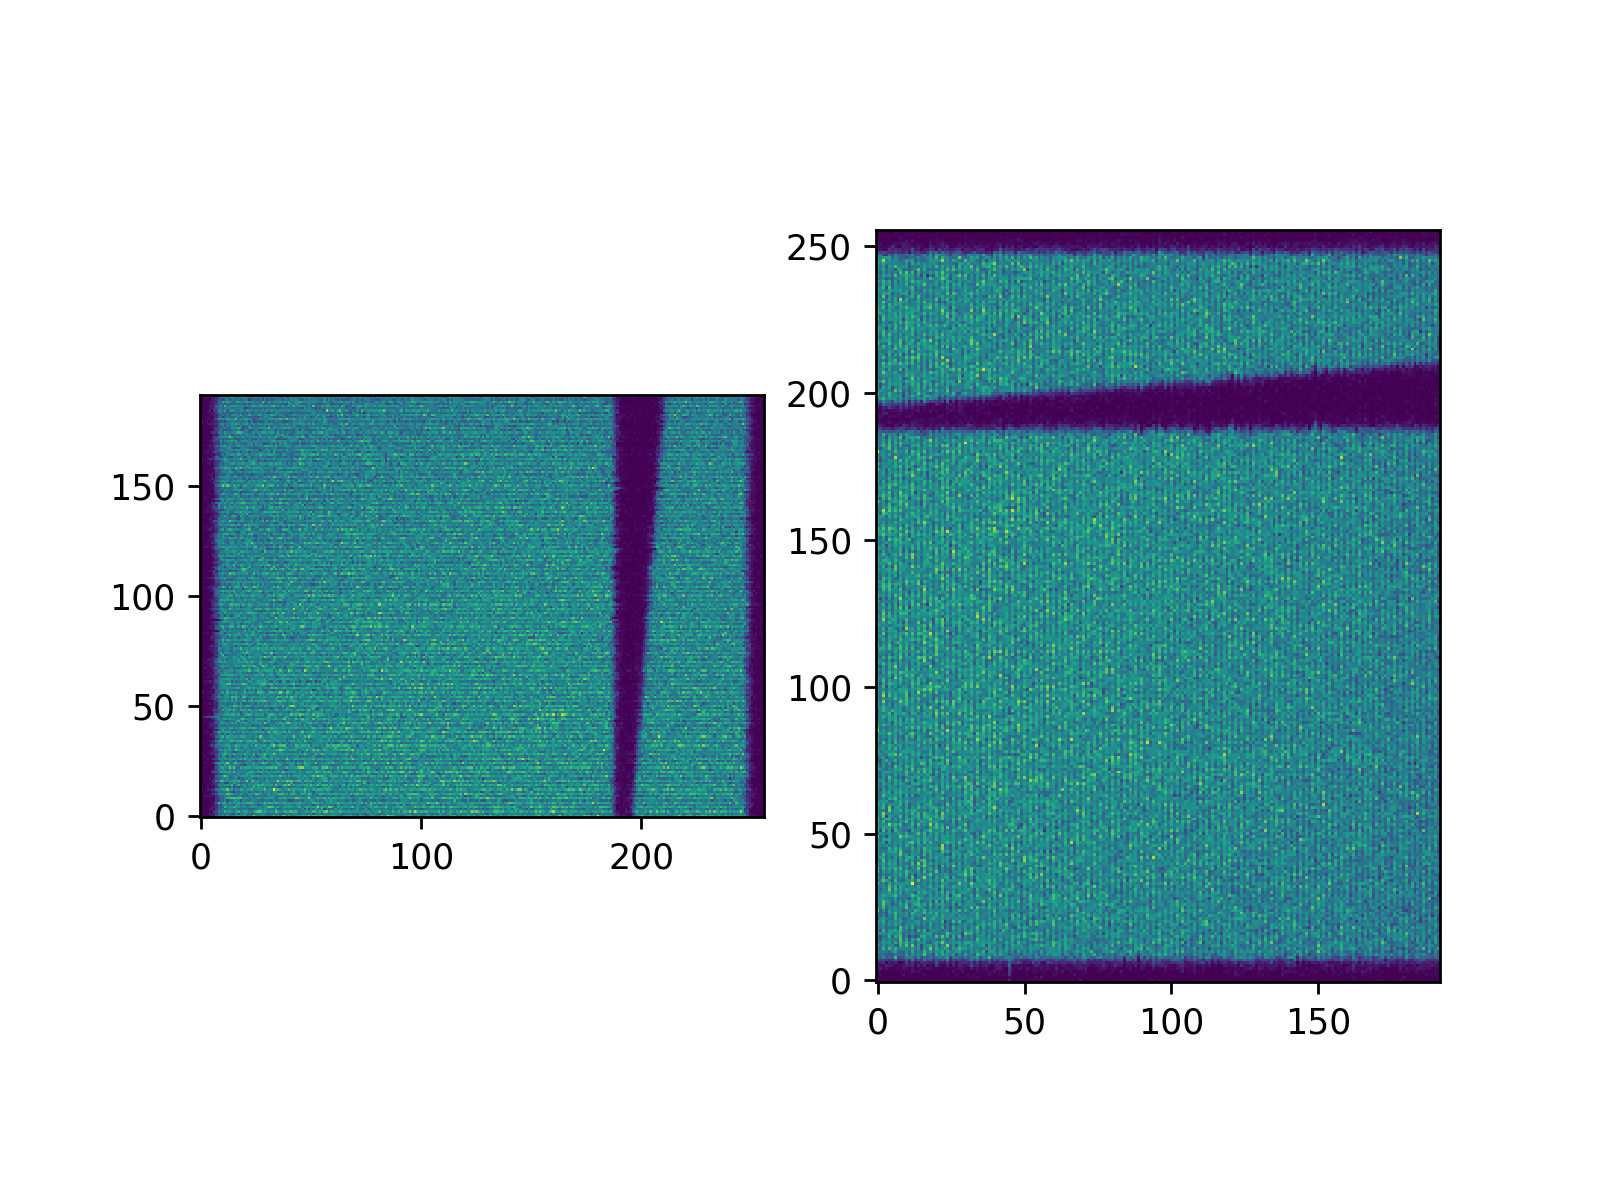

Make an error array with the minimum error to be $\sqrt 3$

The goal is going to be to fit each tube 
To familarize ourself with data let's plot 
Plot the two end tubes.

<IPython.core.display.Javascript object>


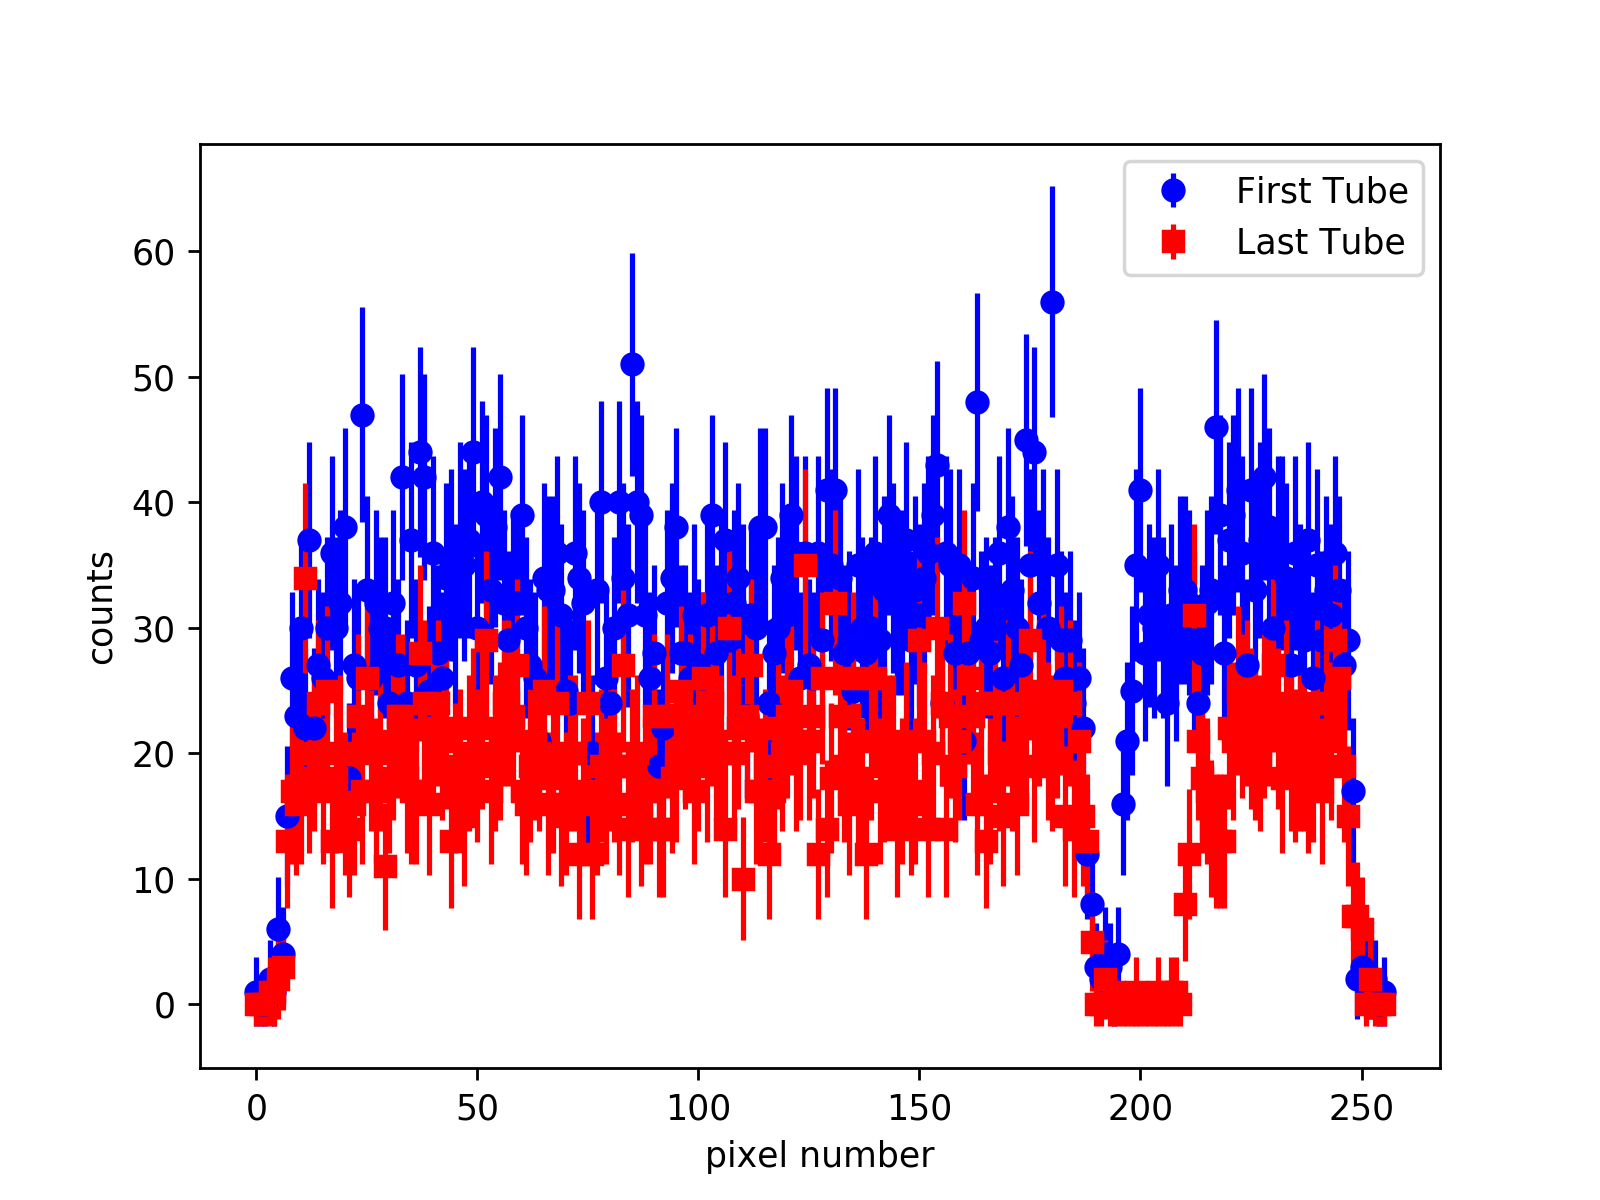

Define a funtion
Let's define a step function


Let's plot the function on top of some data to see what it looks like

<IPython.core.display.Javascript object>


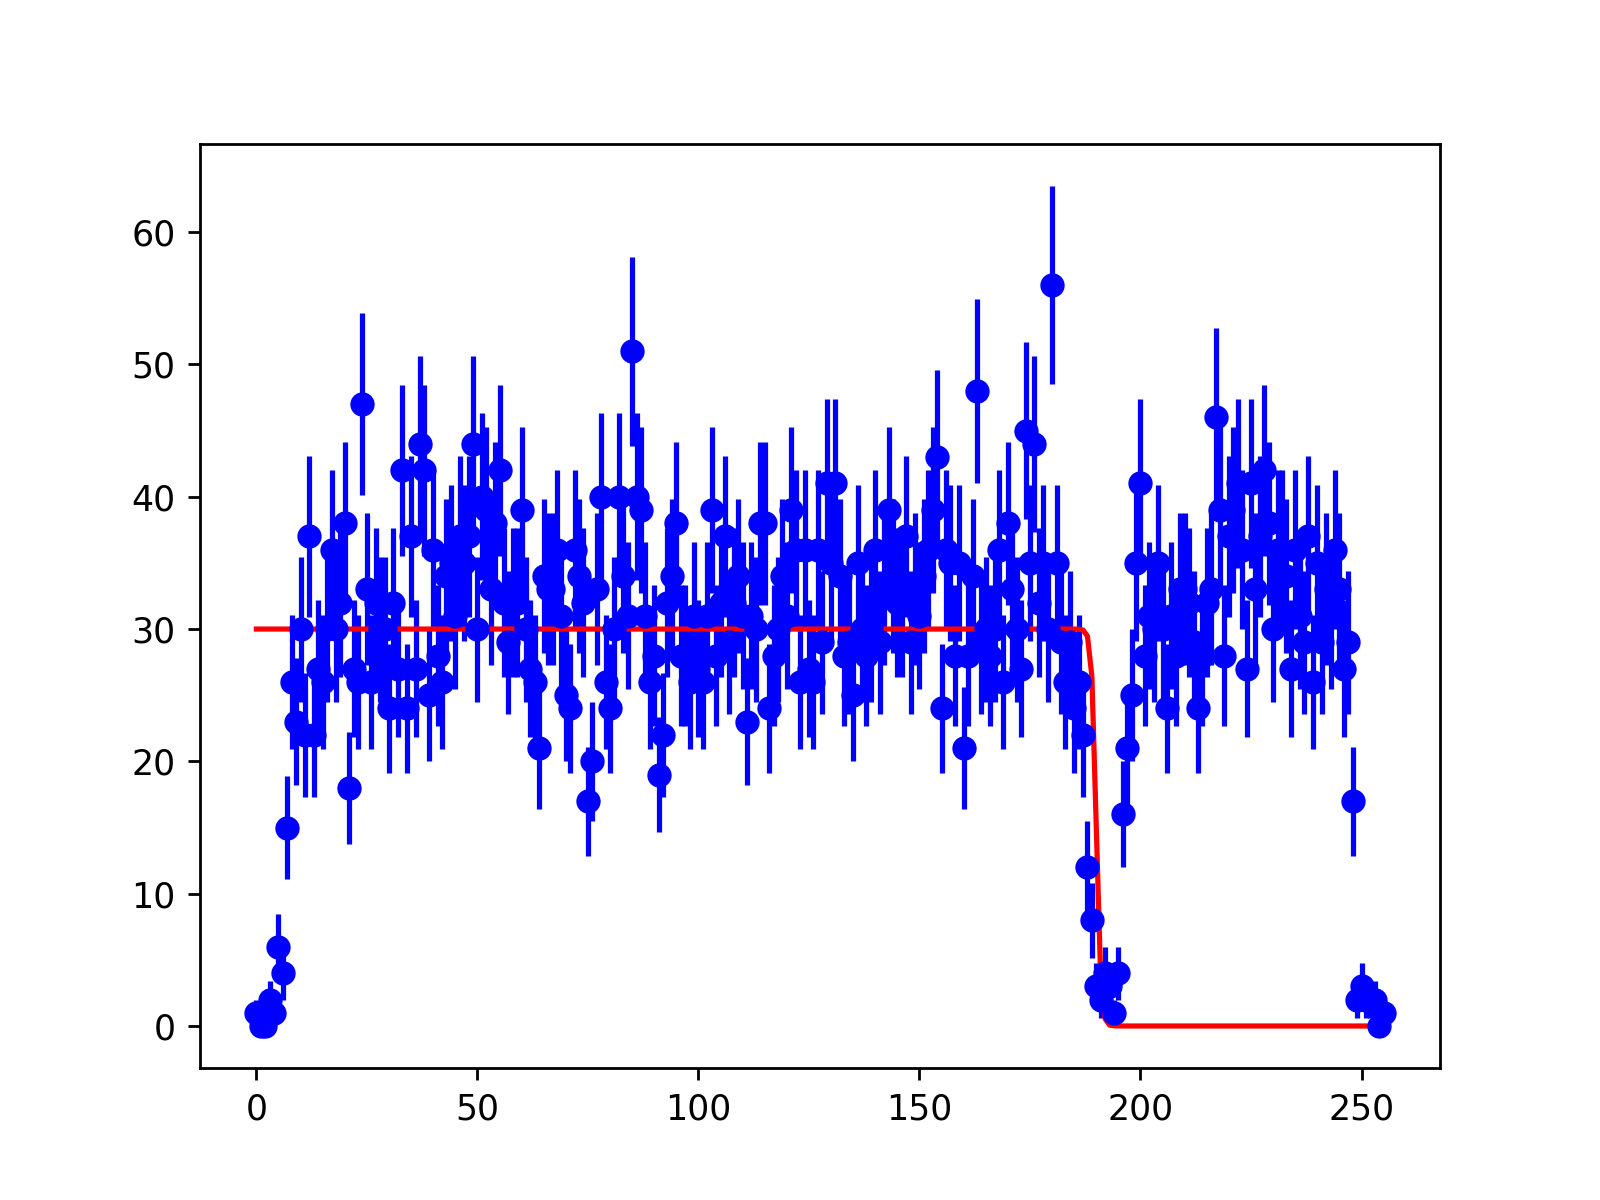

Create the lmfit model

Now let's do a single fit to see how the fitting works.

We only want to fit from where the tube starts seeing signal to the bottom of the step
so we manually choose points 11 through 196.

[[Model]]
    Model(step_f)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 185
    # variables        = 4
    chi-square         = 123.062827
    reduced chi-square = 0.67990512
    Akaike info crit   = -67.4172497
    Bayesian info crit = -54.5358264
[[Variables]]
    cen:  187.392946 +/- 0.43934766 (0.23%) (init = 190)
    Amp:  29.0891697 +/- 1.46132744 (5.02%) (init = 30)
    wid:  2.08552302 +/- 0.74020931 (35.49%) (init = 1)
    b:    2.08988255 +/- 1.37531696 (65.81%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(Amp, b)   = -0.950
    C(wid, b)   = -0.489
    C(Amp, wid) =  0.487
    C(cen, b)   = -0.312
    C(cen, Amp) =  0.259
    C(cen, wid) = -0.116



<IPython.core.display.Javascript object>


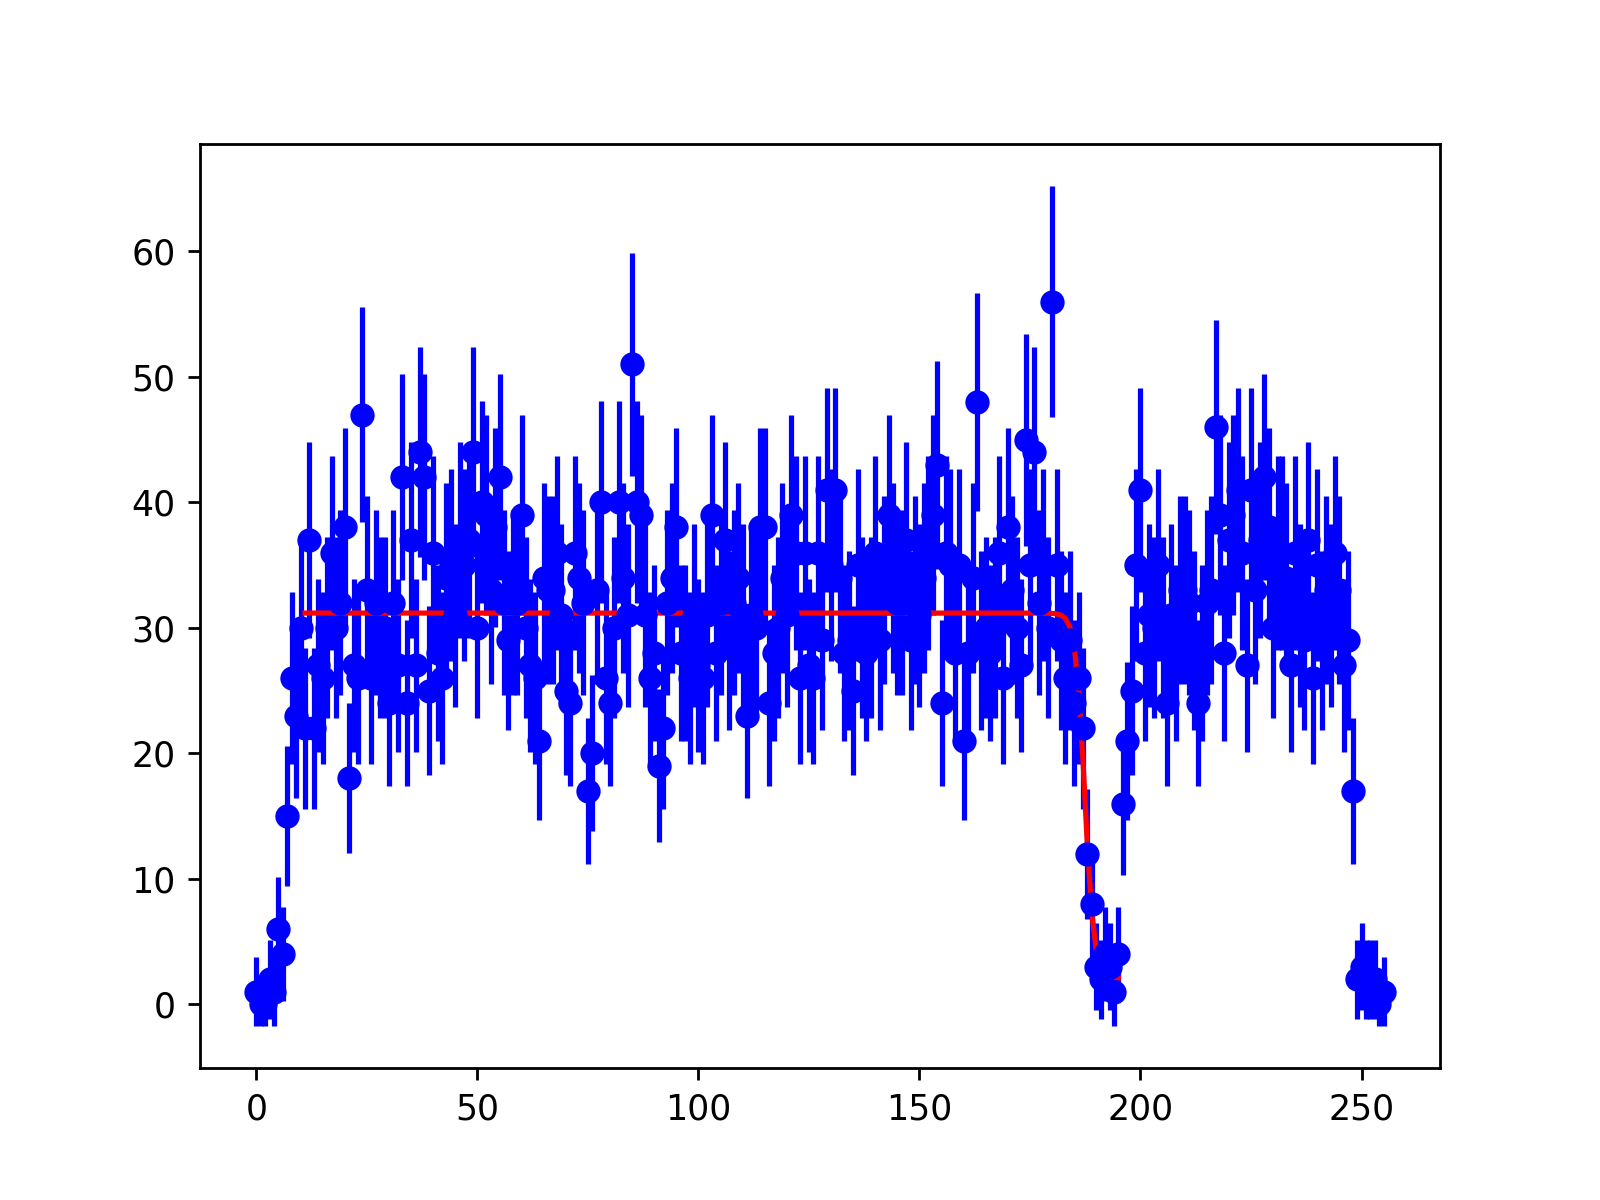

Let's look at what else is the fitting results data structure.

Parameters([('cen',
             <Parameter 'cen', value=187.39294598064478 +/- 0.439, bounds=[-inf:inf]>),
            ('Amp',
             <Parameter 'Amp', value=29.08916974327178 +/- 1.46, bounds=[-inf:inf]>),
            ('wid',
             <Parameter 'wid', value=2.0855230155042443 +/- 0.74, bounds=[-inf:inf]>),
            ('b',
             <Parameter 'b', value=2.089882545353683 +/- 1.38, bounds=[-inf:inf]>)])

187.39294598064478

0.43934766048035817

0.679905123133271

Now let's prepare to fit all the tubes.

For doing the fitting,  we need to determine the average count number for each tube.
The axis variable takes the average along the desired direction rather than of the whole array


We need to find the minmum and maximum pixels.

First let's find the pixels that the Bar is covering

Let's make a boolean array near the expected pixel.

Make a boolean array of points less than half the average value.

196

11

In [39]:
parm_nms=step_mod.param_names

Next make strctured arrays to hold the paramaters.

we use a list comprehension and the dictionary form for creating structured arrays

Loop through each detector and fit

Let's plot the results per tube

<IPython.core.display.Javascript object>


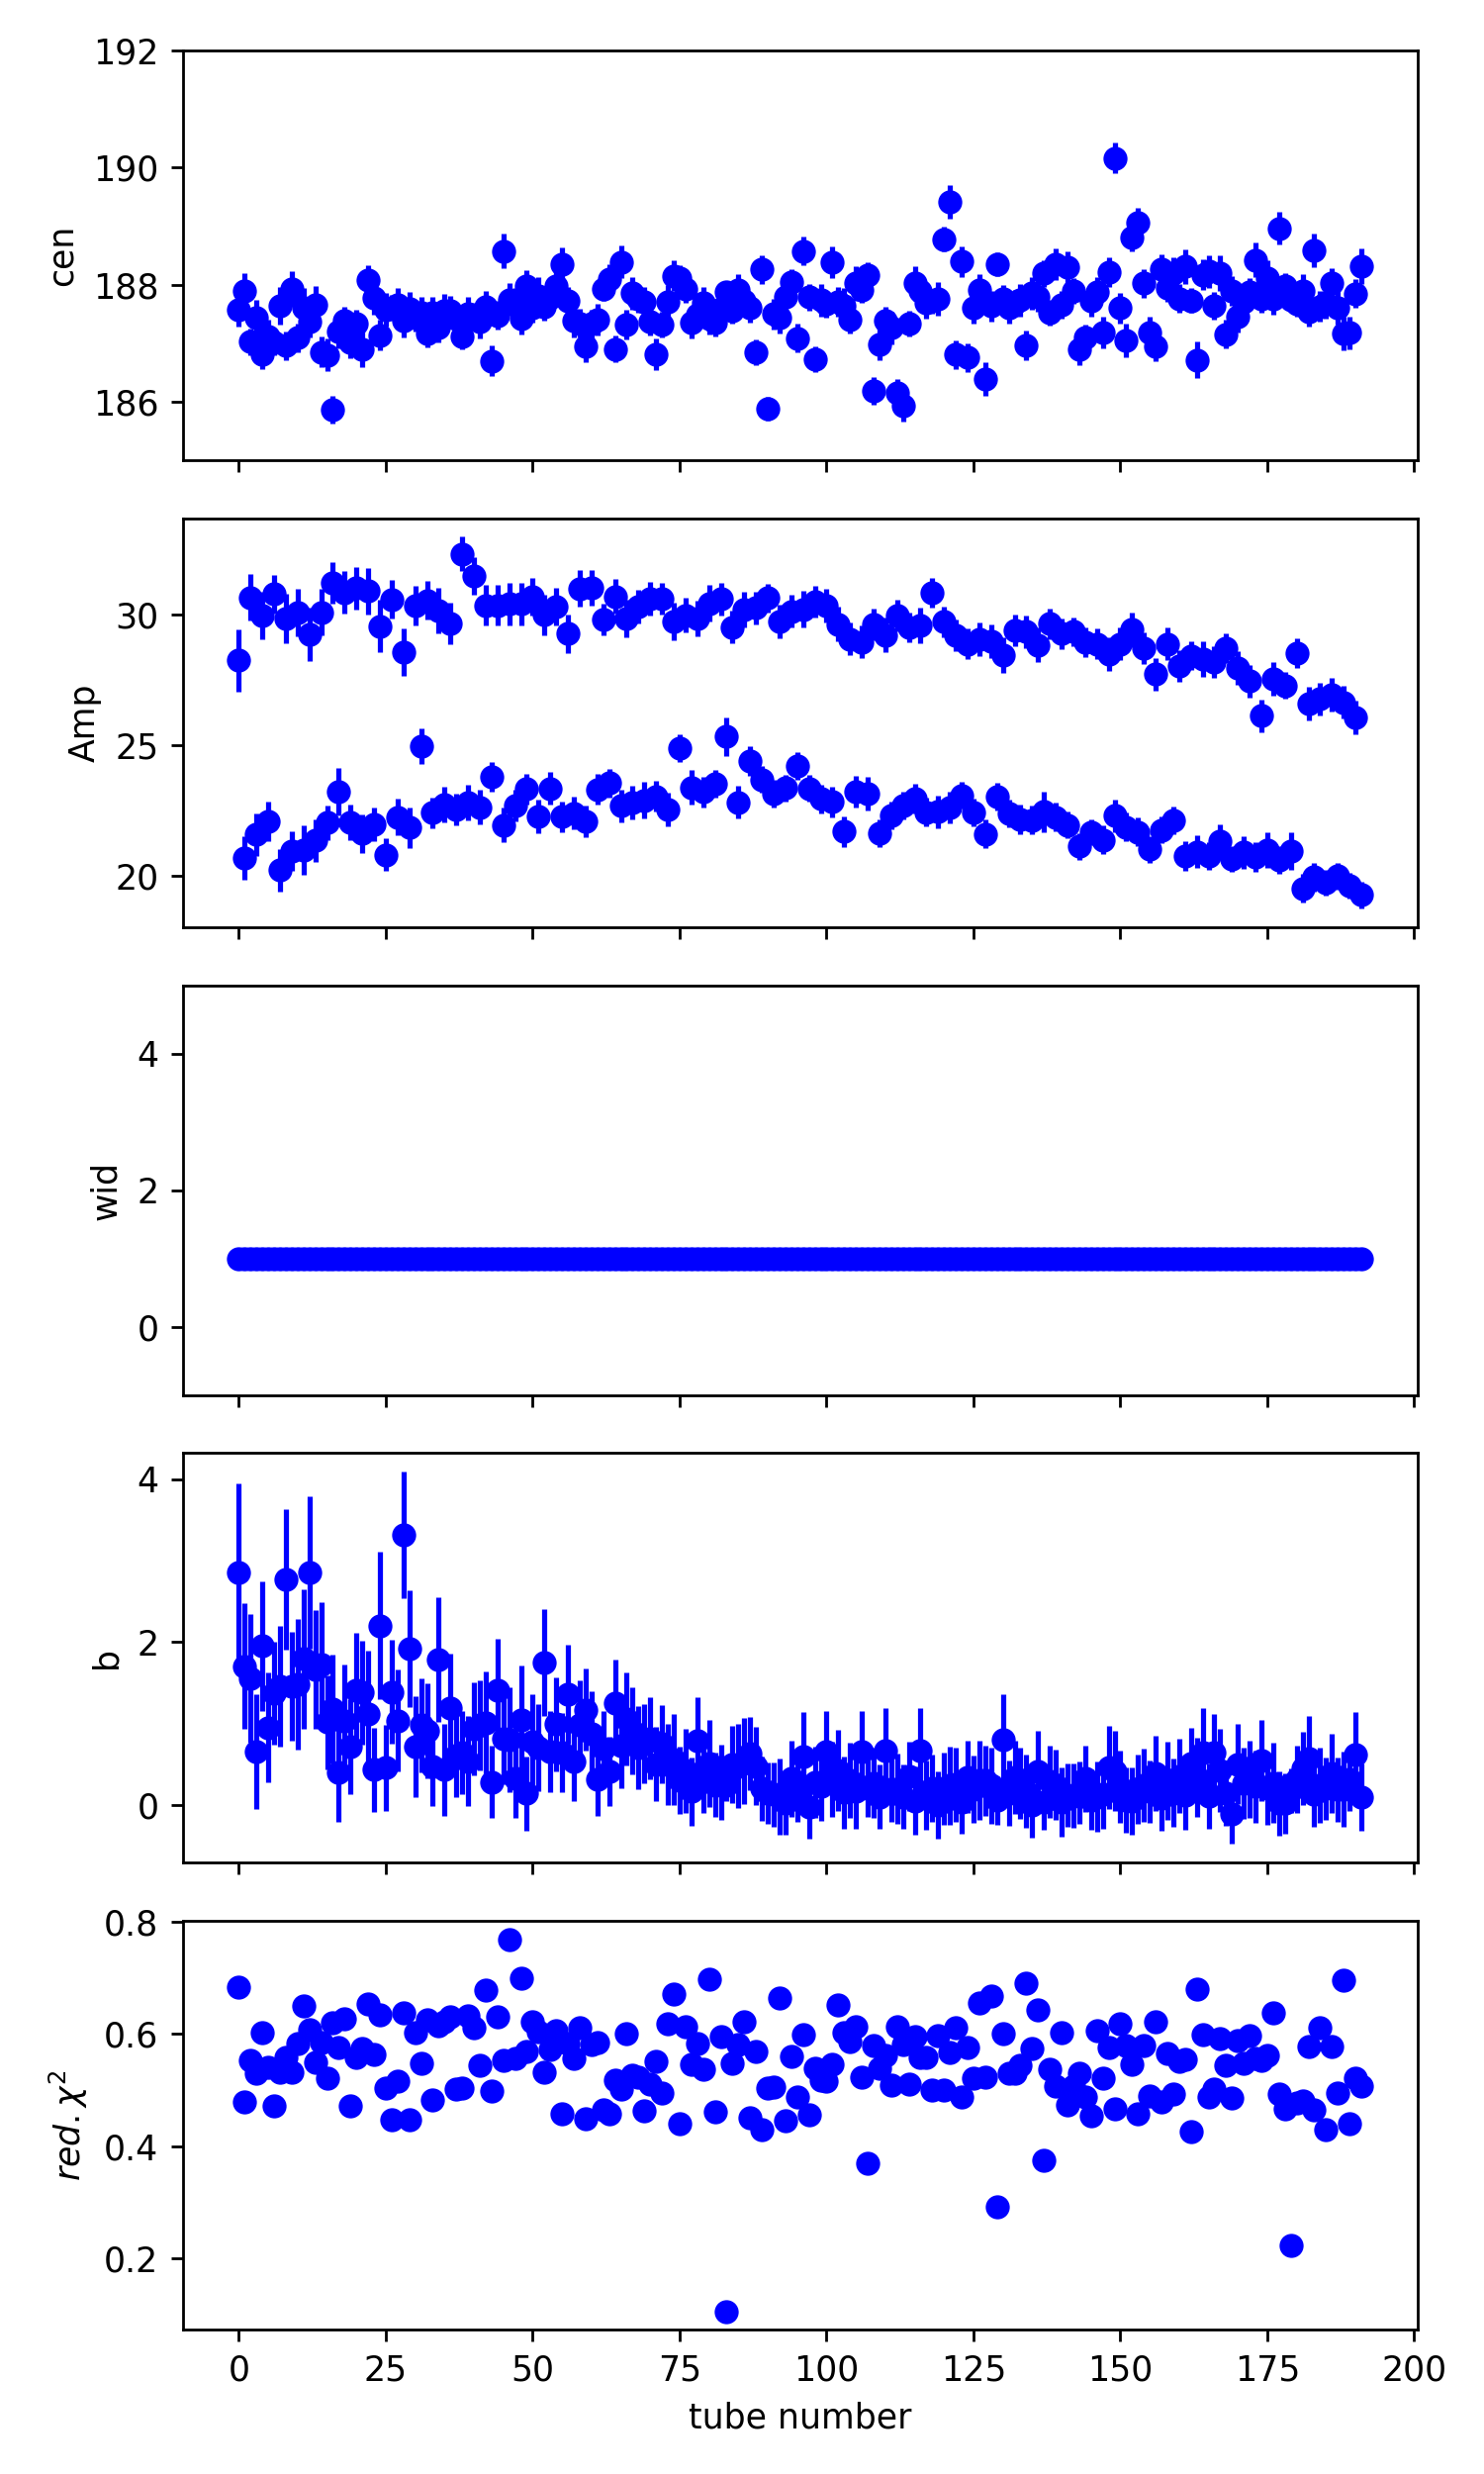

Let's see why the erroabr for the width and center for tube 97 is so large

<IPython.core.display.Javascript object>


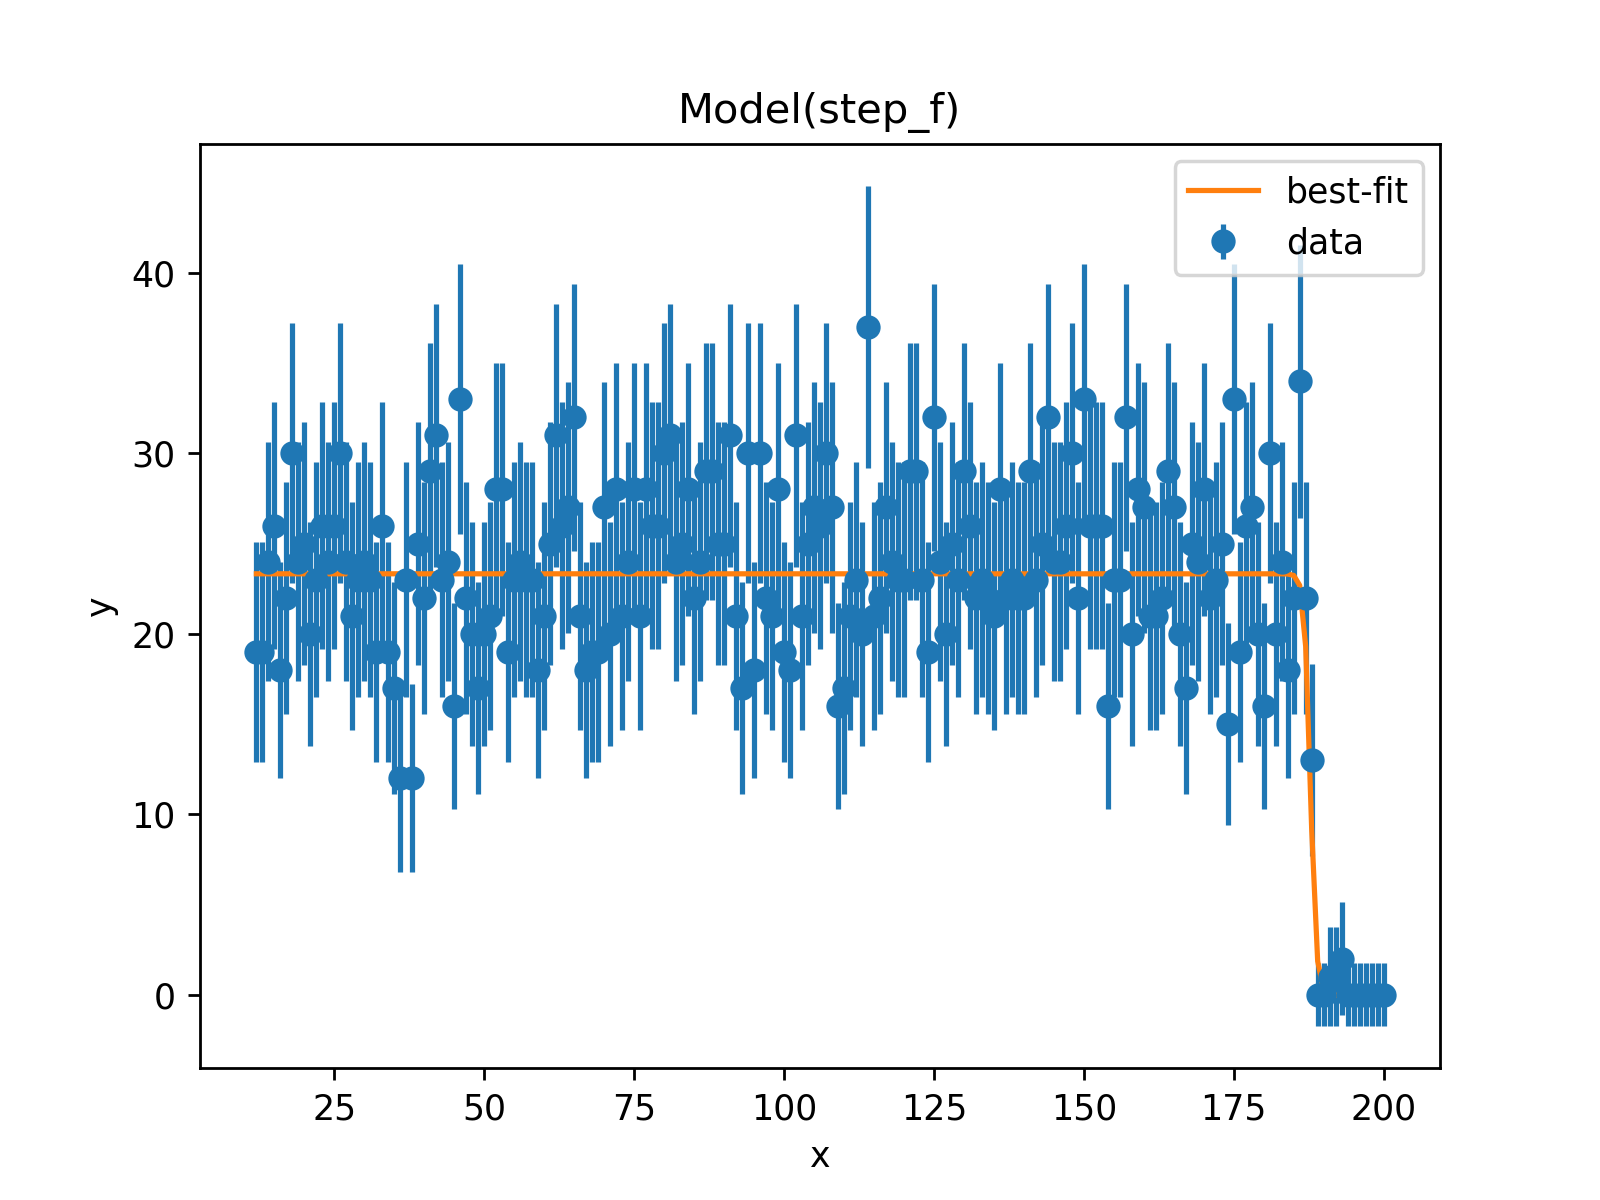


So there is only 1 point to set the width.
If we look at the fit report

[[Model]]
    Model(step_f)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 189
    # variables        = 3
    chi-square         = 84.8655300
    reduced chi-square = 0.45626629
    Akaike info crit   = -145.328333
    Bayesian info crit = -135.603092
[[Variables]]
    cen:  187.783861 +/- 0.22703605 (0.12%) (init = 190.8364)
    Amp:  23.3576504 +/- 0.50812677 (2.18%) (init = 30)
    wid:  1 (fixed)
    b:   -0.03178815 +/- 0.38479005 (1210.48%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(Amp, b)   = -0.753
    C(cen, b)   = -0.269
    C(cen, Amp) =  0.161



We find that the cen and width are highly correlated